In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
import os
import time

# 1. Landmarking using mediapipe holistic

In [2]:
holistics = mp.solutions.holistic # To bring our holistic model
drawing = mp.solutions.drawing_utils # Use fot drawing the utilities

In [3]:
def Detection(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    img.flags.writeable = False                  # Image is no longer writeable
    results = model.process(img)                 # Make prediction
    img.flags.writeable = True                   # Image is now writeable 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return img, results

In [4]:
def DrawingCustomLandmarks(image, results):
    # Draw face connections
    drawing.draw_landmarks(image, results.face_landmarks, holistics.FACEMESH_TESSELATION, 
                             drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    drawing.draw_landmarks(image, results.pose_landmarks, holistics.POSE_CONNECTIONS,
                             drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    drawing.draw_landmarks(image, results.left_hand_landmarks, holistics.HAND_CONNECTIONS, 
                             drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    drawing.draw_landmarks(image, results.right_hand_landmarks, holistics.HAND_CONNECTIONS, 
                             drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = Detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        DrawingCustomLandmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Window', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
frame

array([[[250, 220, 185],
        [246, 221, 191],
        [239, 223, 204],
        ...,
        [226, 218, 198],
        [228, 219, 198],
        [233, 224, 202]],

       [[245, 224, 192],
        [240, 222, 195],
        [234, 225, 206],
        ...,
        [233, 227, 206],
        [231, 224, 202],
        [229, 222, 200]],

       [[226, 223, 196],
        [221, 220, 196],
        [220, 224, 206],
        ...,
        [230, 227, 204],
        [231, 226, 204],
        [231, 225, 203]],

       ...,

       [[130, 126, 140],
        [130, 127, 141],
        [127, 126, 141],
        ...,
        [165, 165, 176],
        [160, 159, 169],
        [158, 156, 167]],

       [[124, 123, 138],
        [125, 124, 140],
        [124, 122, 139],
        ...,
        [107, 110, 122],
        [101, 104, 116],
        [116, 119, 131]],

       [[127, 126, 142],
        [124, 123, 140],
        [122, 121, 139],
        ...,
        [ 34,  39,  52],
        [ 25,  30,  43],
        [ 31,  35,  49]]

In [7]:
DrawingCustomLandmarks(frame, results)

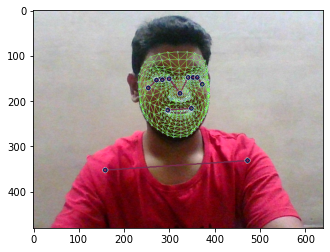

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 2. Extracting the Values

In [9]:
def ExtractingVals(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left, right])

In [10]:
result = ExtractingVals(results)
np.save('New', result)
np.load('New.npy')

array([ 0.50778317,  0.38170341, -1.12434435, ...,  0.        ,
        0.        ,  0.        ])

# 3. Data Collection

In [11]:
# Path for exported data, numpy arrays
DataPath = os.path.join('NewData') 

# Actions that we try to detect
actions = np.array(['Hello', 'Namaste', 'Danger','Walking', 'Angry', 'Drowsy/Sleepy', 'Suspicious', 'Laughing','Sad','Victory'])

# Thirty videos worth of data
numOfSequences = 30

# Videos are going to be 30 frames in length
sequenceLength = 30

# Folder start
startFolder = 30

In [12]:
for action in actions: 
    for sequence in range(numOfSequences):
        try: 
            os.makedirs(os.path.join(DataPath, action, str(sequence)))
        except:
            pass

# 3. Training and Testing

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(numOfSequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequenceLength):
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = Detection(frame, holistic)

                # Draw landmarks
                DrawingCustomLandmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'Starting Collection', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Window', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Window', image)
                
                # NEW Export keypoints
                keypoints = ExtractingVals(results)
                npy_path = os.path.join(DataPath, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 4. Preprocess Data

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'Hello': 0,
 'Namaste': 1,
 'Danger': 2,
 'Walking': 3,
 'Angry': 4,
 'Drowsy/Sleepy': 5,
 'Suspicious': 6,
 'Laughing': 7,
 'Sad': 8,
 'Victory': 9}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(numOfSequences):
        window = []
        for frame_num in range(sequenceLength):
            res = np.load(os.path.join(DataPath, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(300, 30, 1662)

In [20]:
X = np.array(sequences)

In [21]:
X.shape

(300, 30, 1662)

In [22]:
y = to_categorical(labels).astype(int)

In [23]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [92]:
y_test.shape

(15, 10)

# 5. Creating & Training LSTM Neural Network Architecture

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [94]:
log_dir = os.path.join('LogsDirectory')
tb_callback = TensorBoard(log_dir=log_dir)

In [95]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [96]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
9/9 [==============================] - 4s 166ms/step - loss: 5.5622 - categorical_accuracy: 0.0701
Epoch 2/1000
9/9 [==============================] - 1s 85ms/step - loss: 2.3591 - categorical_accuracy: 0.1527 0s - loss: 2.3362 - categorical_accura
Epoch 3/1000
9/9 [==============================] - 1s 83ms/step - loss: 2.2191 - categorical_accuracy: 0.2221
Epoch 4/1000
9/9 [==============================] - 1s 85ms/step - loss: 2.2614 - categorical_accuracy: 0.1482
Epoch 5/1000
9/9 [==============================] - 1s 83ms/step - loss: 2.0871 - categorical_accuracy: 0.3202
Epoch 6/1000
9/9 [==============================] - 1s 83ms/step - loss: 2.2978 - categorical_accuracy: 0.2306
Epoch 7/1000
9/9 [==============================] - 1s 85ms/step - loss: 1.9762 - categorical_accuracy: 0.3467
Epoch 8/1000
9/9 [==============================] - 1s 85ms/step - loss: 1.9845 - categorical_accuracy: 0.2589
Epoch 9/1000
9/9 [==============================] - 1s 83ms/step - loss:

9/9 [==============================] - 1s 109ms/step - loss: 0.8861 - categorical_accuracy: 0.6695
Epoch 74/1000
9/9 [==============================] - 1s 108ms/step - loss: 0.9157 - categorical_accuracy: 0.6554
Epoch 75/1000
9/9 [==============================] - 1s 105ms/step - loss: 0.8538 - categorical_accuracy: 0.6845
Epoch 76/1000
9/9 [==============================] - 1s 108ms/step - loss: 0.8371 - categorical_accuracy: 0.7033
Epoch 77/1000
9/9 [==============================] - 1s 107ms/step - loss: 0.7658 - categorical_accuracy: 0.7098
Epoch 78/1000
9/9 [==============================] - 1s 115ms/step - loss: 0.7668 - categorical_accuracy: 0.7548
Epoch 79/1000
9/9 [==============================] - 1s 105ms/step - loss: 0.6400 - categorical_accuracy: 0.7526
Epoch 80/1000
9/9 [==============================] - 1s 116ms/step - loss: 0.6649 - categorical_accuracy: 0.7575
Epoch 81/1000
9/9 [==============================] - 1s 116ms/step - loss: 0.7769 - categorical_accuracy: 0.72

KeyboardInterrupt: 

In [98]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_19 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 596,906
Trainable params: 596,906
Non-trainable params: 0
________________________________________________

In [99]:
res = model.predict(X_test)

# 6. Make Predictions

In [100]:
actions[np.argmax(res[4])]

'Namaste'

In [101]:
actions[np.argmax(y_test[4])]

'Laughing'

# 7. Save Weights

In [102]:
model.save('action_detection.h5')

In [103]:
# del model

In [104]:
model.load_weights('action_detection.h5')

# 8. Evaluation using Confusion Matrix and Accuracy

In [105]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_train)
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [106]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[252,   4],
        [  1,  28]],

       [[252,   3],
        [  5,  25]],

       [[244,  14],
        [  7,  20]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  8,  21]],

       [[252,   3],
        [  0,  30]],

       [[256,   1],
        [  3,  25]],

       [[258,   1],
        [  2,  24]],

       [[257,   0],
        [  1,  27]],

       [[253,   2],
        [  1,  29]]], dtype=int64)

In [107]:
accuracy_score(ytrue, yhat)

0.9017543859649123

# 9. Test in Real Time

In [111]:
colors = [(255,255,31), (117,245,16), (255,128,0), (28,255,248), (225,28,28), (0,204,204), (204,0,204), (16,117,245),  (0,0,204), (255,255,51)]
def probabilityVisualize(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

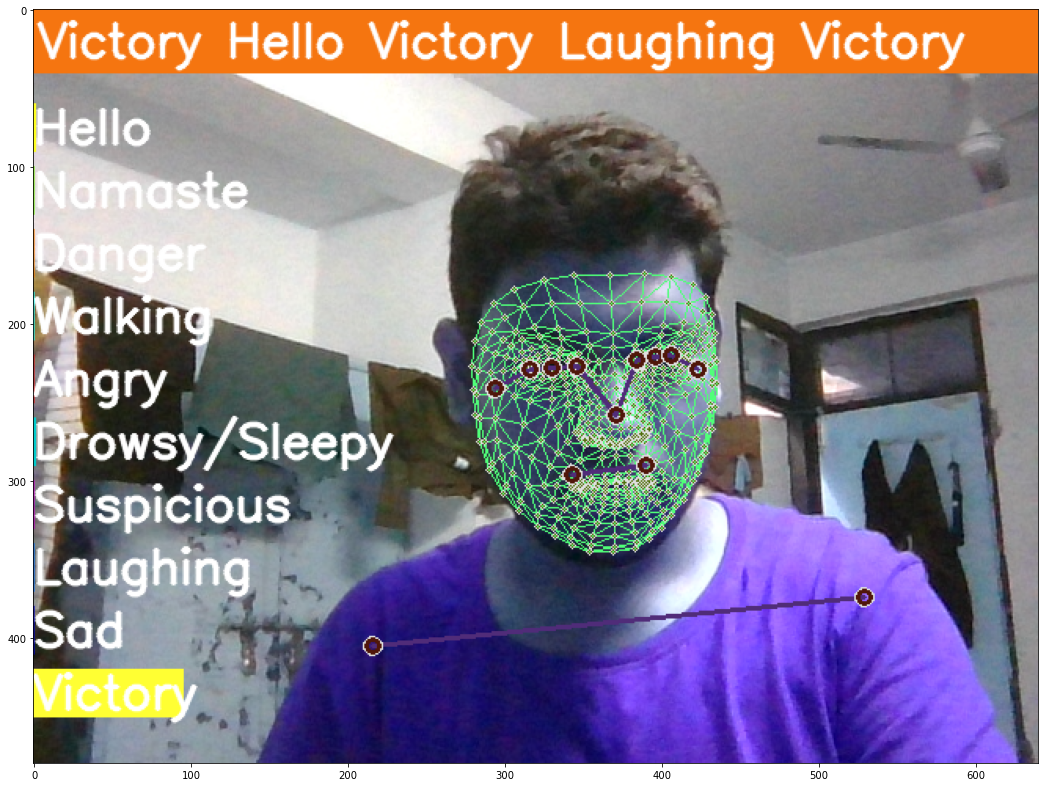

In [113]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [112]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = Detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        DrawingCustomLandmarks(image, results)
        
        # 2. Prediction logic
        keypoints = ExtractingVals(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Window', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Victory
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Angry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Angry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danger
<class 'mediapipe.python.solution_base.SolutionOutputs